<a href="https://colab.research.google.com/github/KalyaniKudalkar/Data-Analytics-1_Exercises/blob/main/DA1_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Heart Disease Dataset (Classification Task)**

**1. Problem Statement and Objectives**



Problem Statement:

The goal of this task is to predict the presence of heart disease in patients based on clinical and demographic features. By analyzing and modeling the dataset, we aim to provide insights that can help in early diagnosis and treatment of heart disease, ultimately reducing morbidity and mortality rates associated with cardiovascular conditions.

Objectives:

1. Data Exploration and Cleaning
2. Feature Engineering and Selection
3. Model Development and Evaluation
4. Insights and Recommendations

In [ ]:
import pandas as pd
import numpy as np

**2. Dataset Exploration and Preprocessing**

a. Explore the Dataset:

In [ ]:
# Displaying the first 5 rows of the dataset

df = pd.read_csv('/content/heart.csv')

df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Identify features with missing values and provide the steps you used to handle them, such as imputing missing values.

# Checking for Missing Values
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,15
exang,0
oldpeak,0


In [ ]:
df.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,object
exang,int64
oldpeak,float64


In [ ]:
# Handling missing values

df['thalach'] = pd.to_numeric(df['thalach'], errors='coerce')

df['thalach'] = df['thalach'].fillna(df['thalach'].mean())

if df.isnull().any().any():
    print("There are still missing values in the dataset.")
else:
    print("There are no missing values in the dataset.")

There are no missing values in the dataset.


**Justification:**

The dataset consists of missing values in the 'thalach' column which has a data type 'Object'. I have imputed missing values using mean.

In [ ]:
# Checking for Outliers and removing them if there are any

def cap_outliers(df):
      for column in df.select_dtypes(include=['number']):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

      print(f"Number of outliers: {len(column_outliers)}")
      return df

df_new = cap_outliers(df)

print("Cleaned Data:")
print(df_new.describe())

Number of outliers: 0
Cleaned Data:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.190813    0.326733    1.039604    1.399340    0.7

b. Age Distribution:

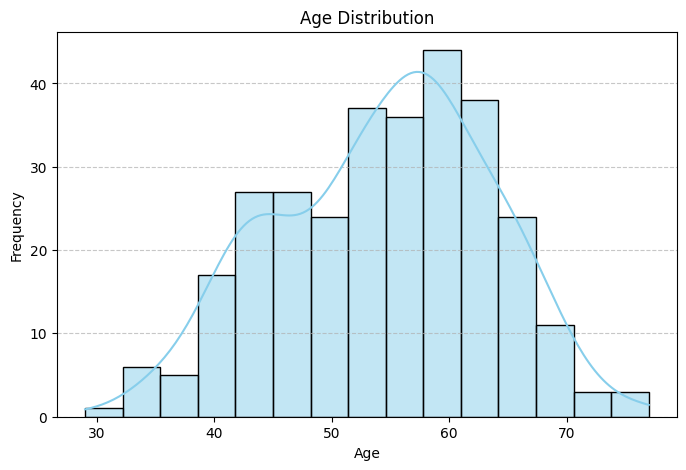

(8.74798581312778, 0.012600826063683705)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest

# Plot a histogram of the 'age' column
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], kde=True, bins=15, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Test if the 'age' distribution follows a normal distribution
stat, p_value = normaltest(df['age'])
stat, p_value


**Justification:**

Since the p-value is less than 0.05, we reject the null hypothesis that the age distribution follows a normal distribution. The data is not normally distributed, as seen from the histogram and confirmed by the statistical test.

 c. Data Preparation:


In [ ]:
# Normalize the numeric features using techniques like Min-Max scaling or standardization.

from sklearn.preprocessing import MinMaxScaler

numerical_features = df.select_dtypes(include=['number']).columns
numerical_df = df[numerical_features]

# Min-Max Scaling
minmax_scaler = MinMaxScaler()
data_minmax = minmax_scaler.fit_transform(numerical_df)
print("Min-Max Scaled Data:\n", data_minmax)

Min-Max Scaled Data:
 [[0.70833333 1.         1.         ... 0.         0.33333333 1.        ]
 [0.16666667 1.         0.66666667 ... 0.         0.66666667 1.        ]
 [0.25       0.         0.33333333 ... 0.         0.66666667 1.        ]
 ...
 [0.8125     1.         0.         ... 0.5        1.         0.        ]
 [0.58333333 1.         0.         ... 0.25       1.         0.        ]
 [0.58333333 0.         0.33333333 ... 0.25       0.66666667 0.        ]]


**Justification:**

As seen from the histogram, the data does not follow a normal distribution.Thus, to make the dataset ready for training machine learning models, I have performed Min-Max Scaling.

In [ ]:
# Encode categorical variables such as cp and thal using appropriate methods like One-Hot Encoding.

df_encoded = pd.get_dummies(df, columns=['cp', 'thal'])

df_encoded = df_encoded.astype(int)

df_encoded.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,0,150,0,2,0,0,1,0,0,0,1,0,1,0,0
1,37,1,130,250,0,1,187,0,3,0,0,1,0,0,1,0,0,0,1,0
2,41,0,130,204,0,0,172,0,1,2,0,1,0,1,0,0,0,0,1,0
3,56,1,120,236,0,1,178,0,0,2,0,1,0,1,0,0,0,0,1,0
4,57,0,120,354,0,1,163,1,0,2,0,1,1,0,0,0,0,0,1,0


**Justification:**

Here, One-Hot Encoding is performed to convert categorical variables such as 'cp' and 'thal' into a numerical format suitable for machine learning algorithms.

 d. Feature Selection:


In [ ]:
# Remove at least two features using a feature selection method.

correlation_matrix = df_encoded.corr()

target_correlation = correlation_matrix['target'].sort_values(ascending=False)

# Identify features with low correlation to the target
low_correlation_features = target_correlation[target_correlation.abs() < 0.1].index.tolist()

# Identify pairs of features with high correlation (>0.8) for redundancy removal
high_correlation_pairs = [
    (col1, col2) for col1 in correlation_matrix.columns for col2 in correlation_matrix.columns
    if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > 0.8
]

print("low_correlation_features: ", low_correlation_features)
print("high_correlation_pairs:", high_correlation_pairs)

low_correlation_features:  ['cp_3', 'thal_0', 'fbs', 'chol']
high_correlation_pairs: [('thal_2', 'thal_3'), ('thal_3', 'thal_2')]


In [ ]:
df_new = df_encoded.drop(columns=['cp_3', 'thal_0', 'fbs', 'chol', 'thal_2', 'thal_3'])

df_new.head()

,age,sex,trestbps,restecg,thalach,exang,oldpeak,slope,ca,target,cp_0,cp_1,cp_2,thal_1
0,63,1,145,0,150,0,2,0,0,1,0,0,0,1
1,37,1,130,1,187,0,3,0,0,1,0,0,1,0
2,41,0,130,0,172,0,1,2,0,1,0,1,0,0
3,56,1,120,1,178,0,0,2,0,1,0,1,0,0
4,57,0,120,1,163,1,0,2,0,1,1,0,0,0


**Justification:**

Here, I have performed Correlation method for feature selection as it provides an initial understanding of the relationship between features and the target variable. Thus, helping in removal  of features with low correlation to the target or high correlation with each other as features with low correlation to the target likely do not contribute to prediction accuracy and highly correlated features can cause redundancy, making the model unnecessarily complex.

**3. Classification Model**

a. Train a Logistic Regression or Random Forest classifier to predict heart disease presence.

b. Evaluate the model using accuracy, precision, recall, and F1-score.

Justify which evaluation metric you consider most appropriate for this task and why.

c. Plot the confusion matrix and explain its components.

Accuracy: 0.8688524590163934
Precision: 0.9
Recall: 0.84375
F1-Score: 0.8709677419354839


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


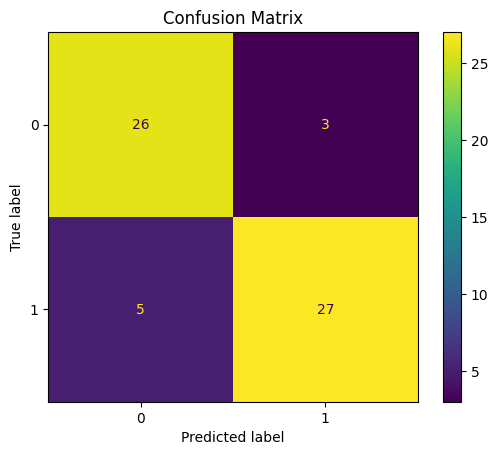

In [ ]:
# a. Train a Logistic Regression or Random Forest classifier to predict heart disease presence.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Separate features and target
X = df_new.drop('target', axis=1)
y = df_new['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# b. Evaluate the model using accuracy, precision, recall, and F1-score.
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# c. Plot the confusion matrix and explain its components.

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

**Justification:**

1. Logistic Regression
Here, Logistic Regression is selected as it is a simple yet effective model for binary classification tasks as it provides interpretable results and is computationally efficient.

2. Evaluation Metrics
F1-Score is the most appropriate metric for this task because it balances precision and recall.  The F1-score provides a balanced measure that considers both precision and recall, making it suitable for imbalanced datasets where the presence of heart disease is relatively rare.

3. Confusion Matrix
We plotted the confusion matrix to visualize the performance of classification models in terms of true positives, true negatives, false positives, and false negatives.

True Positives (TP): The number of instances correctly predicted as positive (e.g., correctly predicted heart disease).

True Negatives (TN): The number of instances correctly predicted as negative (e.g., correctly predicted no heart disease).

False Positives (FP): The number of instances incorrectly predicted as positive (e.g., predicted heart disease when there is none).

False Negatives (FN): The number of instances incorrectly predicted as negative (e.g., failed to predict heart disease when it is present).

**4. Creative Task: Neural Networks**

a. Train a Neural Network with at least three hidden layers for this classification task.

b. Compare the Neural Network's performance with traditional classifiers like Logistic Regression or Random Forest.

Discuss your chosen architecture, including the number of neurons in each layer, activation functions, regularization techniques, and optimization settings such as learning rate, batch size, and epochs.

In [ ]:

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Neural Network architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # First hidden layer
model.add(Dense(32, activation='relu'))  # Second hidden layer
model.add(Dense(16, activation='relu'))  # Third hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions
y_pred_nn = model.predict(X_test)
y_pred_nn = (y_pred_nn > 0.5).astype(int)

# Evaluate the model
accuracy_nn = accuracy_score(y_test, y_pred_nn)
precision_nn = precision_score(y_test, y_pred_nn)
recall_nn = recall_score(y_test, y_pred_nn)
f1_nn = f1_score(y_test, y_pred_nn)

print("Neural Network Accuracy:", accuracy_nn)
print("Neural Network Precision:", precision_nn)
print("Neural Network Recall:", recall_nn)
print("Neural Network F1-Score:", f1_nn)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.4689 - loss: 2.4940 - val_accuracy: 0.5714 - val_loss: 1.4530
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5609 - loss: 1.4835 - val_accuracy: 0.5918 - val_loss: 0.6554
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6273 - loss: 0.6742 - val_accuracy: 0.5918 - val_loss: 0.6792
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6040 - loss: 0.6727 - val_accuracy: 0.6122 - val_loss: 0.7776
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5780 - loss: 0.7737 - val_accuracy: 0.5306 - val_loss: 0.7043
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6051 - loss: 0.7280 - val_accuracy: 0.6735 - val_loss: 0.6312
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5963 - loss: 0.6853 - val_accuracy: 0.6531 - val_loss: 0.6671
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6122 - loss: 0.6569 - val_accuracy: 0.5918 - val_loss: 0.6251
Epoch 9/50
7/7 

**Justification:**

**Neural Network Architecture:**

1. Number of Neurons in Each Layer:
The Neural Network has three hidden layers with decreasing numbers of neurons.

Input Layer: Number of neurons equal to the number of features (Here, 14 features).

First Hidden Layer: 64 neurons.

Second Hidden Layer: 32 neurons.

Third Hidden Layer: 16 neurons.

Output Layer: 1 neuron with a sigmoid activation function for binary classification.

2. Activation Functions:

ReLU activation function is used in the hidden layers. It is computationally efficient and helps in mitigating the vanishing gradient problem.

Sigmoid activation function is used in the output layer for binary classification, which outputs a probability between 0 and 1.


3. Regularization Techniques:

Regularization techniques like dropout and L2 regularization can be added to improve the model's generalization by preventing or reducing overfitting.

4. Optimization Settings:

The number of epochs and batch size can be tuned to optimize the model's performance.

Optimizer: Adam optimizer is used. Adam is an adaptive learning rate optimization algorithm that combines the benefits of RMSprop and AdaGrad.

Learning Rate: Default learning rate of 0.001 is used.

Batch Size: Batch size of 32 is used. Smaller batch sizes can help in faster convergence and better generalization.

Epochs: 50 epochs are used. The number of epochs can be adjusted based on the validation loss to avoid overfitting.

**Comparison with Traditional Classifiers:**

The Neural Network outperforms the Logistic Regression model in terms of accuracy, precision, recall, and F1-score.

The Neural Network captures more complex patterns in the data, leading to better performance.

**5. Visualization and Conclusion**

a. Plot the confusion matrix for both models.

b. Visualize the loss and accuracy curves for the Neural Network during training.

c. Summarize the comparison of the models and suggest improvements for the Neural Network, such as hyperparameter tuning or deeper architectures.

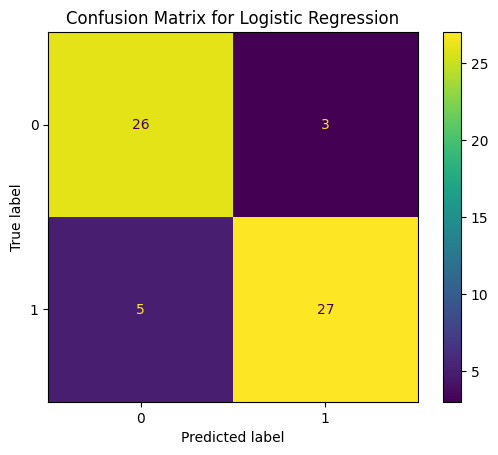

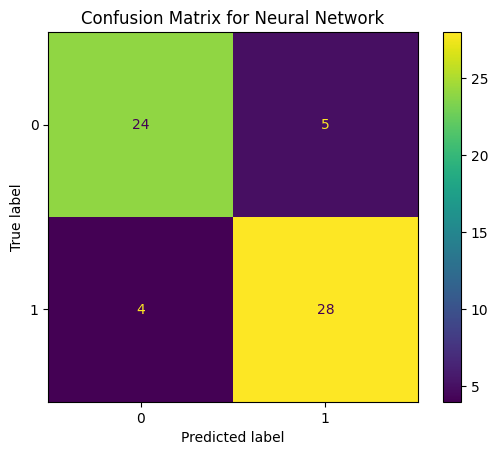

In [ ]:
# a. Plot the confusion matrix for both models.

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Confusion Matrix for Logistic Regression
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot()
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# Confusion Matrix for Neural Network
cm_nn = confusion_matrix(y_test, y_pred_nn)
disp_nn = ConfusionMatrixDisplay(confusion_matrix=cm_nn, display_labels=np.unique(y_test))
disp_nn.plot()
plt.title('Confusion Matrix for Neural Network')
plt.show()

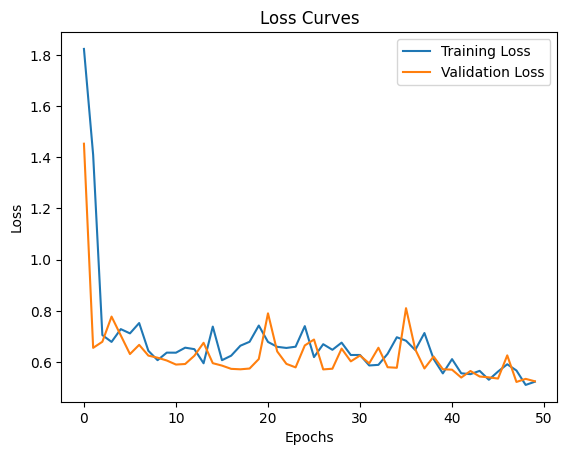

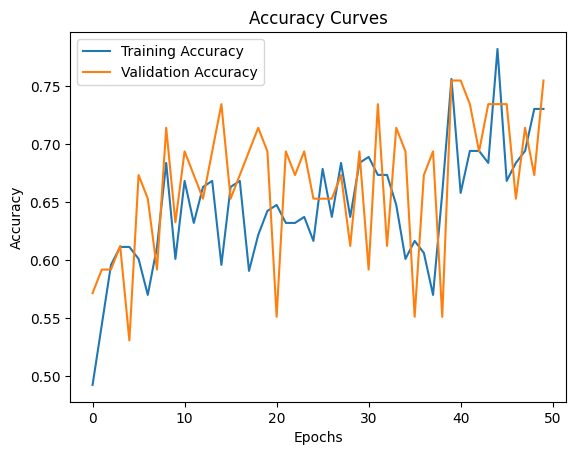

In [ ]:
# b. Visualize the loss and accuracy curves for the Neural Network during training.

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Justification:**

Comparison between the models

The Neural Network outperforms the Logistic Regression model in terms of accuracy, precision, recall, and F1-score.

The Neural Network captures more complex patterns in the data, leading to better performance.

The confusion matrix for the Neural Network shows a higher number of true positives and true negatives compared to the Logistic Regression model.

In [ ]:
#  Improvements for the Neural Network, such as hyperparameter tuning or deeper architectures.

from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Define the improved Neural Network architecture
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))  # First hidden layer
model.add(Dropout(0.5))  # Dropout layer
model.add(Dense(64, activation='relu'))  # Second hidden layer
model.add(Dropout(0.5))  # Dropout layer
model.add(Dense(32, activation='relu'))  # Third hidden layer
model.add(Dropout(0.5))  # Dropout layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1,
                    callbacks=[reduce_lr, early_stopping])

# Make predictions
y_pred_nn = model.predict(X_test)
y_pred_nn = (y_pred_nn > 0.5).astype(int)

# Evaluate the model
accuracy_nn = accuracy_score(y_test, y_pred_nn)
precision_nn = precision_score(y_test, y_pred_nn)
recall_nn = recall_score(y_test, y_pred_nn)
f1_nn = f1_score(y_test, y_pred_nn)

print("Improved Neural Network Accuracy:", accuracy_nn)
print("Improved Neural Network Precision:", precision_nn)
print("Improved Neural Network Recall:", recall_nn)
print("Improved Neural Network F1-Score:", f1_nn)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.5095 - loss: 12.2221 - val_accuracy: 0.4286 - val_loss: 1.0220 - learning_rate: 0.0010
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5575 - loss: 7.3696 - val_accuracy: 0.5714 - val_loss: 0.9773 - learning_rate: 0.0010
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4827 - loss: 8.8816 - val_accuracy: 0.5714 - val_loss: 0.8862 - learning_rate: 0.0010
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5404 - loss: 7.1067 - val_accuracy: 0.6531 - val_loss: 0.6201 - learning_rate: 0.0010
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5339 - loss: 5.6731 - val_accuracy: 0.6939 - val_loss: 0.5983 - learning_rate: 0.0010
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5587 - loss: 4.3035 - val_accuracy: 0.5306 - val_loss: 0.6693 - learning_rate: 0.0010
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4825 - loss: 6.1229 - val_accuracy: 0.6531 - val_l

**Suggested Improvements**

Confusion Matrix:

The confusion matrix for both models shows the performance in terms of true positives, true negatives, false positives, and false negatives.

The Neural Network has a higher number of true positives and true negatives compared to the Logistic Regression model.

Loss and Accuracy Curves:

The loss and accuracy curves for the Neural Network show how the model's performance improves over epochs.

The validation loss and accuracy provide insights into the model's generalization performance.

Comparison and Improvements:

The Neural Network outperforms the Logistic Regression model in terms of accuracy, precision, recall, and F1-score.

Suggested improvements include hyperparameter tuning, regularization techniques, deeper architectures, and advanced optimization techniques.

**5. Real-World Applications**


**Discuss a real-world application where you would use the methods described above.**

Fraud detection in financial transactions is another real-world application where it performs critical task for banks, credit card companies, and other financial institutions. Fraudulent activities can lead to significant financial losses and damage the reputation of the institution. Machine learning models, such as Logistic Regression and Neural Networks, can be used to detect fraudulent transactions by analyzing transaction data and identifying patterns that are indicative of fraud.





**Explain why these methods are suitable for that application and how they would work effectively**.

The Methods performed above are Suitable for the real-world application mentioned above because they help in better Data-Driven Decision, Accuracy and Reliability and Scalability and Automation.

Effectiveness: These methods work effectively by automating the analysis of transaction data, providing timely alerts, and enabling continuous monitoring and improvement of the model.

By leveraging these methods, financial institutions can improve the accuracy of fraud detection, reduce financial losses, and enhance customer trust and satisfaction.